In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")
train_data.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
#Info about train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1235 non-null   object 
 8   peripheral_pulse       1235 non-null   object 
 9   mucous_membrane        1235 non-null   object 
 10  capillary_refill_time  1235 non-null   object 
 11  pain                   1235 non-null   object 
 12  peristalsis            1235 non-null   object 
 13  abdominal_distention   1235 non-null   object 
 14  nasogastric_tube       1235 non-null   object 
 15  naso

In [4]:
#Checking the missing data
train_data.isna().sum()

id                       0
surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [5]:
train_data["outcome"].nunique()

3

In [6]:
train_data.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


<ipython-input-7-bf03caafbbc0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True, linewidths = 1, linecolor = 'white', cmap = 'crest');


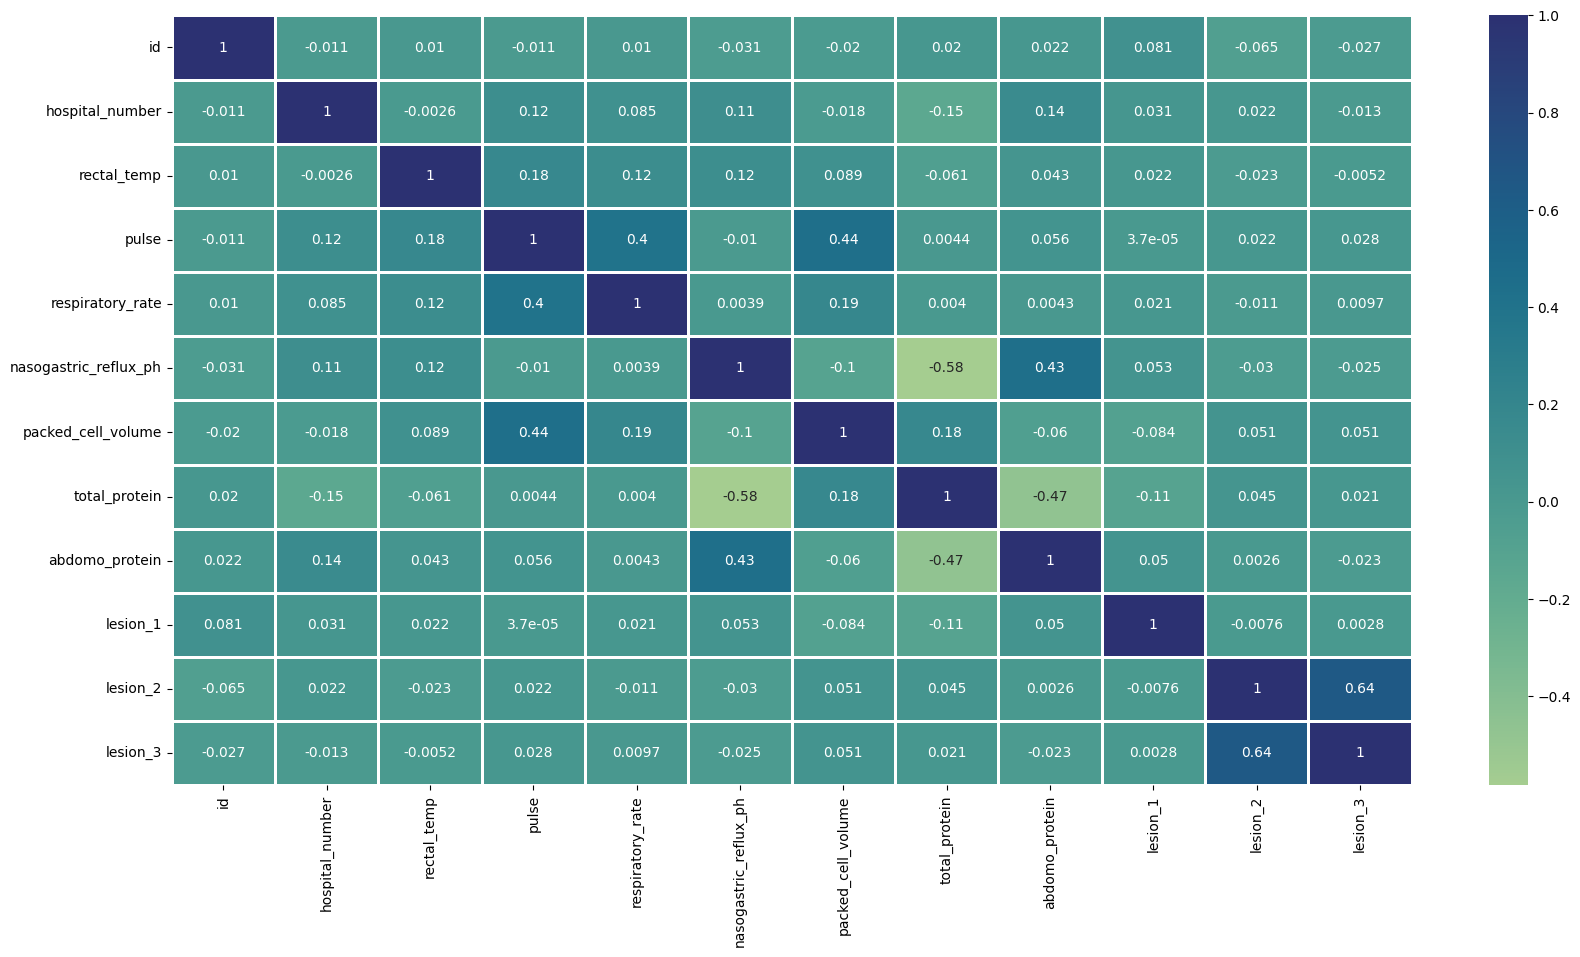

In [7]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(train_data.corr(), annot = True, linewidths = 1, linecolor = 'white', cmap = 'crest');

In [8]:
#Removing the id because id column is not needed
train_data = train_data.drop(columns="id")
train_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [9]:
#Creating function for preprocessing the data to categorical
#Most of the time i was using the step to chage the datatypes to categorical but
#but this it give error when working with xgboost model
"""def preprocess_data(data):
    for label, content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label]=content.astype("category").cat.as_ordered()
    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            data[label] = pd.Categorical(content).codes+1
    return data"""

'def preprocess_data(data):\n    for label, content in data.items():\n        if pd.api.types.is_string_dtype(content):\n            data[label]=content.astype("category").cat.as_ordered()\n    for label, content in data.items():\n        if not pd.api.types.is_numeric_dtype(content):\n            data[label] = pd.Categorical(content).codes+1\n    return data'

In [10]:
#using LabelEncoder to change the datatype
le = LabelEncoder()
for i in train_data.loc[:, train_data.dtypes == object].columns:
    train_data[i] = le.fit_transform(train_data[i])

In [11]:
train_data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,1,0,530001,38.1,132.0,24.0,2,4,3,3,...,57.0,8.5,3,3.4,1,2209,0,0,0,0
1,1,0,533836,37.5,88.0,12.0,2,3,5,3,...,33.0,64.0,3,2.0,1,2208,0,0,0,1
2,1,0,529812,38.3,120.0,28.0,2,4,6,2,...,37.0,6.4,3,3.4,1,5124,0,0,0,2
3,1,0,5262541,37.1,72.0,30.0,1,4,6,3,...,53.0,7.0,2,3.9,1,2208,0,0,1,2
4,0,0,5299629,38.0,52.0,48.0,3,3,4,2,...,47.0,7.3,2,2.6,0,0,0,0,1,2


In [12]:
X = train_data.drop("outcome", axis=1)
y = train_data["outcome"]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20 , random_state = 42)

In [14]:
rdf_model = RandomForestClassifier()
rdf_model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
rdf_model.score(X_val,y_val)

0.7165991902834008

In [16]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [17]:
xgb_model.score(X_val,y_val)

0.7044534412955465

In [21]:
#Prediction the test value
y_preds_rdf = rdf_model.predict(X_val)
y_preds_xgb = xgb_model.predict(X_val)
print(y_preds_rdf)
print(y_preds_xgb)

[2 1 0 2 2 0 0 0 2 2 2 0 2 0 1 1 2 0 0 2 1 1 2 2 2 1 1 2 2 1 1 0 0 1 0 2 2
 0 0 0 2 0 2 0 1 1 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 1 1 2 0 0 2 1 2
 0 1 2 1 0 0 2 2 2 1 2 0 2 1 2 2 2 0 1 0 1 0 2 2 1 2 2 0 1 0 2 1 0 0 2 0 0
 0 0 1 1 0 2 1 0 2 2 0 0 0 2 0 2 2 0 0 1 1 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2
 1 0 2 0 2 1 2 2 2 2 1 0 0 0 2 0 2 0 2 0 2 2 0 0 2 2 2 2 0 0 2 2 2 0 0 0 0
 2 0 0 0 0 1 2 0 2 0 1 2 2 2 0 2 2 2 0 0 1 2 2 1 2 0 0 2 2 2 0 2 1 2 2 0 1
 0 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 2 0 0 1]
[1 1 0 2 2 0 0 0 2 2 2 0 2 0 1 1 2 0 0 2 1 1 2 2 2 1 1 2 1 1 1 0 0 1 0 0 2
 0 0 0 2 0 2 0 1 1 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 1 1 0 0 1 2 1 2
 0 1 2 1 1 0 2 2 2 2 0 0 2 0 2 2 2 0 1 1 1 0 2 1 1 2 2 0 1 0 2 1 0 0 2 0 0
 0 0 1 1 0 2 1 0 2 2 0 0 2 2 0 2 2 0 0 2 1 2 0 2 2 0 2 2 2 2 0 0 2 2 2 1 2
 1 0 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 2 1 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0
 2 2 0 0 0 1 2 0 2 0 0 2 2 0 2 2 2 2 0 0 2 2 2 1 0 0 0 2 2 2 0 2 1 2 2 0 1
 0 2 2 2 2 2 2 0 0 2 0 2 0 2 2 0 2 2 2 0 2 2 0 0

In [29]:
#Confusion matrix
cm_rdf = confusion_matrix(y_val,y_preds_rdf)
cm_xgb = confusion_matrix(y_val,y_preds_xgb)
print(cm_rdf)
print(cm_xgb)

[[53  2 17]
 [11 32 11]
 [23  6 92]]
[[51  1 20]
 [10 34 10]
 [25  7 89]]


In [27]:
f1_score(y_preds_rdf,y_val,average="micro")

0.7165991902834008

In [28]:
f1_score(y_preds_xgb,y_val,average="micro")

0.7044534412955465

Reading and Preparing the prediction for test dataset


In [31]:
test_data = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")
test_data

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,None,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,None,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,2054,no,adult,529461,40.3,114.0,36.0,cool,reduced,normal_pink,...,distend_large,57.0,8.1,serosanguious,4.5,yes,3205,0,0,yes
820,2055,yes,adult,535338,37.2,100.0,20.0,cool,reduced,pale_cyanotic,...,distend_small,50.0,66.0,serosanguious,2.0,yes,2209,0,0,no
821,2056,yes,adult,529640,39.2,132.0,12.0,cool,reduced,dark_cyanotic,...,None,53.0,7.6,serosanguious,4.5,yes,2205,0,0,no
822,2057,no,adult,5287179,38.3,54.0,66.0,normal,normal,normal_pink,...,None,49.0,8.6,clear,5.0,no,3111,0,0,yes


In [32]:
#First we have to look to sample submission file to Kaggle
sample_sb = pd.read_csv("/content/drive/MyDrive/dataset/sample_submission.csv")
sample_sb.head()

,id,outcome
0,1235,lived
1,1236,lived
2,1237,lived
3,1238,lived
4,1239,lived


In [33]:
#Now I have to preprocess the test data like i did to train data
test_id = test_data["id"]
test_data = test_data.drop("id",axis=1)

In [34]:
le = LabelEncoder()
for i in test_data.loc[:, test_data.dtypes == object].columns:
    test_data[i] = le.fit_transform(test_data[i])

In [35]:
test_data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,534053,38.6,40.0,20.0,3,3,4,2,...,2,42.0,7.5,1,2.3,0,0,0,0,0
1,1,0,528469,38.2,112.0,48.0,2,4,1,3,...,2,44.0,6.0,3,2.6,0,2208,0,0,1
2,1,0,528178,37.7,66.0,12.0,2,3,2,2,...,2,31.5,6.0,2,1.6,1,2205,0,0,1
3,0,0,534784,37.1,88.0,20.0,2,4,5,2,...,1,75.0,81.0,0,1.0,1,1400,0,0,0
4,1,0,529840,38.3,50.0,12.0,0,3,1,2,...,2,37.0,6.8,2,2.6,1,2208,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0,0,529461,40.3,114.0,36.0,2,4,4,3,...,1,57.0,8.1,3,4.5,1,3205,0,0,1
820,1,0,535338,37.2,100.0,20.0,2,4,5,3,...,2,50.0,66.0,3,2.0,1,2209,0,0,0
821,1,0,529640,39.2,132.0,12.0,2,4,3,3,...,0,53.0,7.6,3,4.5,1,2205,0,0,0
822,0,0,5287179,38.3,54.0,66.0,3,3,4,2,...,0,49.0,8.6,1,5.0,0,3111,0,0,1


In [38]:
# Now that RandomForestClassifer F1 score is little bit higher than XGBoost, i will use RFC to predict test values
test_preds = rdf_model.predict(test_data)
test_preds[:5]

array([2, 0, 2, 1, 2])

In [39]:
# Lets change the labels to objective format as shown in sample submission file
labels = {0: 'died', 1: 'euthanized', 2: 'lived'}
test_preds_labels = [labels[label] for label in test_preds]

In [40]:
# Creating DataFrame for submission
data_preds = pd.DataFrame()
data_preds["id"] = test_id
data_preds["outcome"] = test_preds_labels
data_preds.head()

,id,outcome
0,1235,lived
1,1236,died
2,1237,lived
3,1238,euthanized
4,1239,lived


In [41]:
data_preds.to_csv("/content/drive/MyDrive/dataset/test_preds.csv", index = False)